<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/11_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptive boost algorithm
- It is an algorithm that "adapts" by learning from its mistakes at each step.
- It essentially has three meain features : Forest of stumps, amount of say, order of stumps

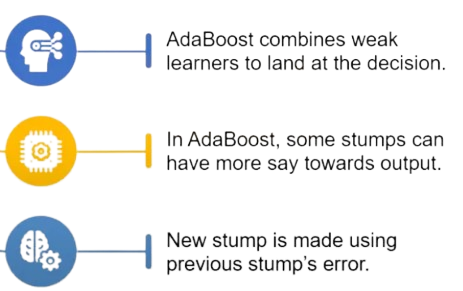

## Working of the algorithm
- AdaBoost (Adaptive Boosting) starts by training a weak learner (typically a decision stump - a one-level decision tree) on the training data, where initially all samples have equal weights.
- After this first model makes predictions, AdaBoost identifies which samples were misclassified and increases their weights while decreasing the weights of correctly classified samples, essentially telling the next weak learner "pay more attention to these difficult examples."
- It then trains a second weak learner on this reweighted dataset, and the process repeats - each new weak learner focuses more heavily on the mistakes of the previous ensemble.
- Crucially, each weak learner also gets assigned an importance weight or 'amount of say' based on its accuracy (more accurate learners get higher influence in the final vote).
- After training all weak learners (typically 50-200), AdaBoost makes final predictions by taking a weighted vote from all learners, where better-performing learners have more say.

### Train a stump → Identify misclassified samples from this current stump → Increase weight of misclassified samples and decrease weight of correctly classified samples → Train the next stump on reweighted data → Repeat this process → Finally take weighted vote based on all stumps (weighted by their individual performance)

## First we will implement AdaBoost algorithm from scratch

In [184]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [185]:
df = pd.DataFrame()

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [186]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

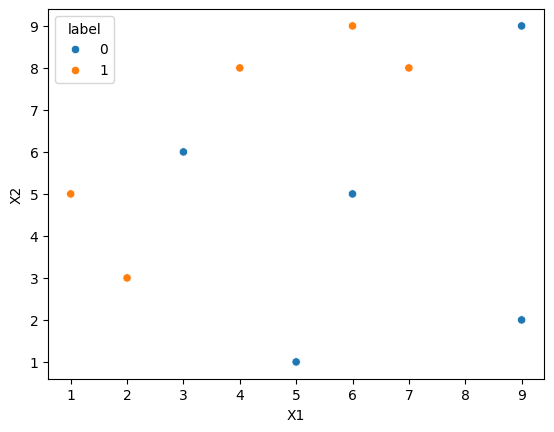

In [187]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [188]:
df['weights'] = 1/df.shape[0]

In [189]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
# Stump
dt1 = DecisionTreeClassifier(max_depth=1)

In [192]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [193]:
# Step 1 : Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

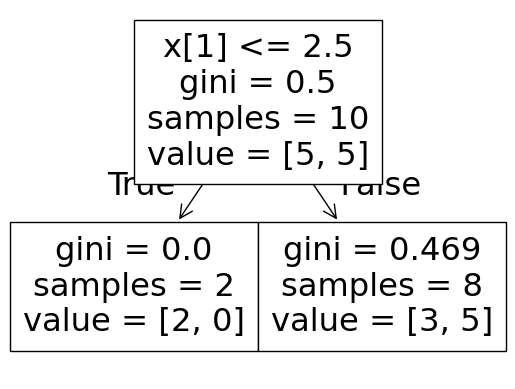

In [194]:
from sklearn.tree import plot_tree
plot_tree(dt1)
#initially df has 5 samples of each class, X[1] feature is chosen for the split based on gini index
# after split left node has 2 samples of class 0 and none of class 1 hence Gini index is 0
# right node has 3 samples of class 0 and 5 of class 1 hence Gini index is 0.469

<Axes: >

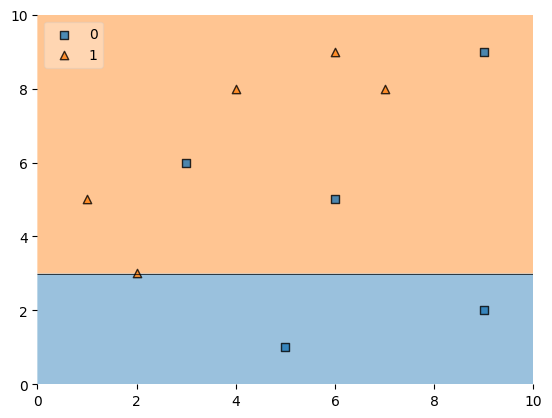

In [195]:
plot_decision_regions(X, y, clf=dt1, legend=2)
# It is evedint that this stump is misclassifying 3 samples hecne weights of these samples will be increased

In [196]:
df['y_pred'] = dt1.predict(X)

In [197]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [198]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [199]:
# Step 2 : calculate model weight (amount of say)
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [200]:
# Step 3 : Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [201]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [202]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [203]:
# sum of weights should be 1, else normalise it
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [204]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [205]:
df['nomalized_weights'].sum()

np.float64(1.0)

Here we will create new dataset instead of using weighted gini index, based on random number and lower-upper bounds

In [206]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [207]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [208]:
index_values = create_new_dataset(df)

index_values

[8, 9, 5, 4, 3, 0, 6, 6, 8, 6]

Here thought it looks like all have equal weights, the sample with increased weight (that was initially misclassified) is present more number of times in new dataset, hence it implicitly has higher weight

In [209]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
8,9,9,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1


In [210]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.625, 0.5, '  False')]

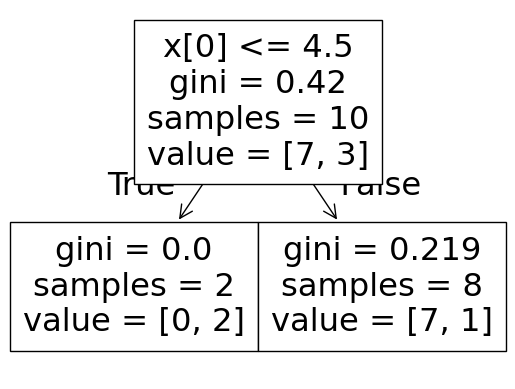

In [211]:
plot_tree(dt2)

In the new dataset not all original samples are present

<Axes: >

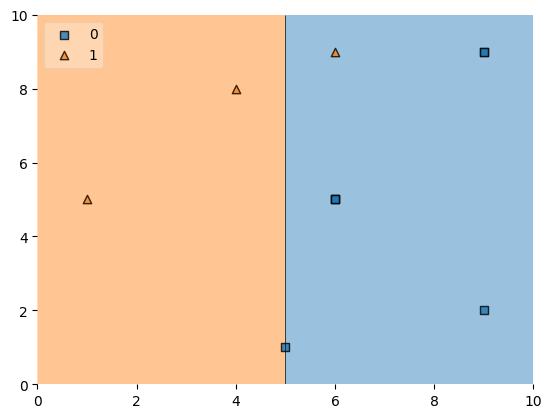

In [212]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [213]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0


In [214]:
alpha2 = calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [215]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [216]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622


In [217]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
8,9,9,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034


In [218]:
second_df['nomalized_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.056034,0.000000,0.056034
9,9,2,0,0.1,0,0.056034,0.056034,0.112068
5,6,9,1,0.1,0,0.495694,0.112068,0.607762
4,5,1,0,0.1,0,0.056034,0.607762,0.663796
3,4,8,1,0.1,1,0.056034,0.663796,0.719830
0,1,5,1,0.1,1,0.056034,0.719830,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
6,6,5,0,0.1,0,0.056034,0.831898,0.887932
8,9,9,0,0.1,0,0.056034,0.887932,0.943966
6,6,5,0,0.1,0,0.056034,0.943966,1.000000


In [219]:
index_values = create_new_dataset(second_df)

third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
0,1,5,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [220]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.625, 0.5, '  False')]

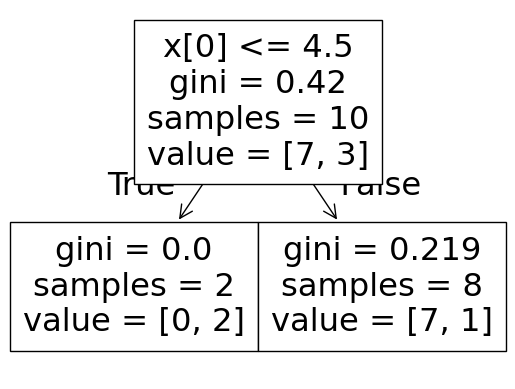

In [221]:
plot_tree(dt3)

<Axes: >

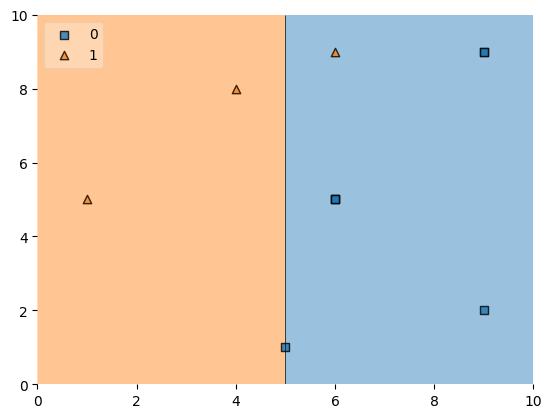

In [222]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [223]:
third_df['y_pred'] = dt3.predict(X)

third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0


In [224]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [225]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


Prediction

In [226]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [227]:
dt2.predict(query)

array([1])

In [228]:
dt3.predict(query)

array([1])

In [229]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [230]:
np.sign(1.09)

np.float64(1.0)

In [231]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [232]:
dt2.predict(query),dt3.predict(query)

(array([0]), array([0]))

In [233]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [234]:
np.sign(-0.25)

np.float64(-1.0)

## Implementing AdaBoost using sklearn

In [235]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [236]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [237]:
from sklearn.datasets import load_iris
dataset=load_iris()

In [238]:
x=dataset.data
y=dataset.target

In [239]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt=train_test_split(x,y,test_size=0.2,random_state=42)

In [240]:
model.fit(xt,yt)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [241]:
model.score(xtt,ytt)

0.9333333333333333